# 18.330 Problem set 5 (spring 2020)

## Submission deadline: 11:59pm on Tuesday, March 10

### Exercise 1: Finite differences via interpolation

Consider the simplest forward finite-difference approximation for $f'(x)$:

$$g(h) := \frac{f(x + h) - f(x)}{h}$$

When we calculate this numerically, there are *two* sources of error: truncation error, coming from approximating the exact Taylor expansion with a finite piece of it, *and* floating-point roundoff error.

1. Suppose that we perturb the input, $h$, by $\Delta h$. Calculate (analytically) an approximation to the (absolute) error $\Delta g$ on the output to first order in $\Delta h$; you should find that it grows like $h^{-1}$.

2. Suppose that the input perturbation size is $\epsilon_\text{mach}$; the error from [1] is then the **roundoff error**. Find an estimate for the value of $h$ at which the truncation error balances with the roundoff error, and find the size of the error there. Compare this with the plot that we did in class.

3. Consider an interval $[a, b]$ and let $m$ be the midpoint of the interval.
Use Lagrange interpolation to find an analytical expression for the unique
quadratic function that passes through $(a, f(a))$, $(m, f(m))$ and $(b, f(b))$.

4. Use your result from [3] to derive the centered difference approximation for
the derivative $f'(t_k)$ in terms of equally-spaced points $t_k$ separated by
a distance $h$.

5. What approximation does it give for the second derivative $f''(t_k)$?

6. Use [3] to find a backward difference expression for $f'(t_k)$ using
information at nodes $t_{k-2}$ and $t_{k-1}$.

7. Find numerically the rate of convergence of the results from [3] and [4] for
equally-spaced points separated by a distance $h$ for the function $\sin(2x)$ at $x = \pi/4$, for values of $h$ between $10^{-6}$ and $10^{-1}$.







##### 1. Suppose that we perturb the input, $h$, by $\Delta h$. Calculate (analytically) an approximation to the (absolute) error $\Delta g$ on the output to first order in $\Delta h$; you should find that it grows like $h^{-1}$.
$\Delta g = g(h+\Delta h) - g(h) = \frac{f(x+h+\Delta h) - f(x)}{h + \Delta h} - \frac{f(x+h)-f(x)}{h} = \frac{f(x+h)+f'(x+h)\Delta h - f(x)}{h}(1 - \frac{\Delta h}{h}) - \frac{f(x+h)-f(x)}{h} = \frac{f'(x+h)}{h}\Delta h + O(\Delta h^2)$


##### 2. Suppose that the input perturbation size is $\epsilon_\text{mach}$; the error from [1] is then the **roundoff error**. Find an estimate for the value of $h$ at which the truncation error balances with the roundoff error, and find the size of the error there. Compare this with the plot that we did in class.


In [15]:
using Plots

In [9]:
f(x) = x^3 + 2x^2 - x - 1
df(x) = 3x^2 + 4x - 1
fh(x, h) = (f(x + h) - f(x))/h;

In [13]:
x = 2
hs = [10.0^i for i in -16:0.1:1]
fhs = fh.(x, hs)
δs = fhs .- df(x);

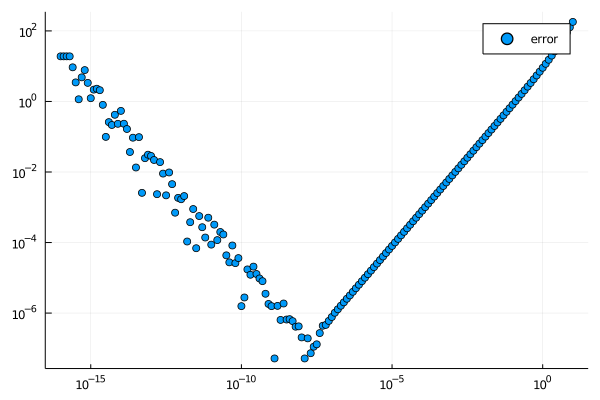

In [18]:
scatter(hs, abs.(δs), scale=:log10, label="error")

from the picture above we can see that when h < 1e-7, the round-off error dominates, which grows like O(h^-1). When h > 1e-7, the truncation error dominates, which grows like O(h). The picture is in log-log scale, so you see two straight lines instead.

##### 3. Consider an interval $[a, b]$ and let $m$ be the midpoint of the interval. Use Lagrange interpolation to find an analytical expression for the unique quadratic function that passes through $(a, f(a))$, $(m, f(m))$ and $(b, f(b))$.

$$\ell(x) = f(a)\frac{(x-m)(x-b)}{(a-m)(a-b)} + f(m)\frac{(x-a)(x-b)}{(m-a)(m-b)} + f(b)\frac{(x-a)(x-m)}{(b-a)(b-m)}$$

##### 4. Use your result from [3] to derive the centered difference approximation for the derivative $f'(t_k)$ in terms of equally-spaced points $t_k$ separated by a distance $h$.




$$f'(t_k) \simeq \frac{f(t_{k+1})-f(t_{k-1})}{2h}$$

##### 5. What approximation does it give for the second derivative $f''(t_k)$?


$$f''(t_k) \simeq \frac{f(t_{k-1}) - 2f(t_k) + f(t_{k+1})}{h^2}$$

##### 6. Use [3] to find a backward difference expression for $f'(t_k)$ using information at nodes $t_{k-2}$ and $t_{k-1}$.

$$f'(t_k) = \frac{f(t_{k-2})+3f(t_{k-1})}{2h}$$

##### 7. Find numerically the rate of convergence of the results from [3] and [4] for equally-spaced points separated by a distance $h$ for the function $\sin(2x)$ at $x = \pi/4$, for values of $h$ between $10^{-6}$ and $10^{-1}$.

In [39]:
dg(x, h) = (sin(x + h) - sin(x - h))/2/h

dg (generic function with 1 method)

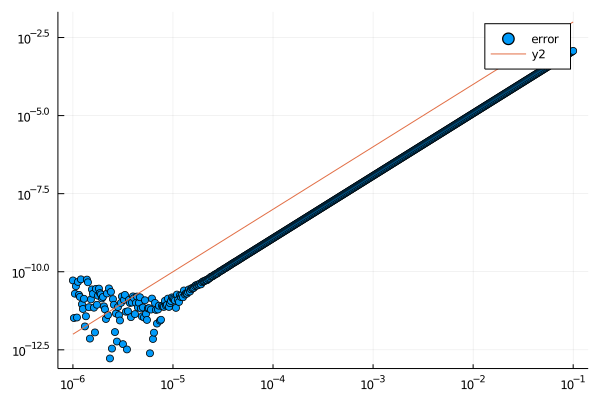

In [46]:
x = π/4
hs = [10^i for i in -6:0.01:-1]
δs = abs.(dg.(x, hs) .- cos.(x))
scatter(hs, δs, scale=:log10, label="error")
plot!(hs, hs.^2)

from the picture above we can see this algorithm is order-2

### Exercise 2: Integration using Simpson's rule

In this problem we will derive the second-order Newton--Cotes quadrature rule, known as **Simpson’s rule**, for calculating $\int_a^b f(x) \, dx$.

Suppose you are given an $N$-point quadrature rule with nodes $(t_k)_{k=0}^N$ and weights $(w_k)_{k=0}^N$ for integrating over the interval $[-1, 1]$. That is, the $t_k$  are $N+1$ points with $-1 \le t_k \le 1$, and the $w_k$ are given to you such that

$$\int_{-1}^1 f(x) \, dx \simeq \sum_{k=0}^N w_k \, f(t_k)$$

1. Construct a new quadrature rule for integrating over a
general interval $[u, v]$. I.e., find $t_k'$ and $w_k'$ such that

    $$\int_{u}^v f(x) \, dx \simeq \sum_{k=0}^N w_k' f(t_k')$$


Derive the basic (Basic quadrature rules are for nodes distributed over a single interval; composite quadrature rules are obtained by splitting up a large interval into subintervals and using a basic rule on each subinterval.) second-order Newton--Cotes quadrature rule for
$\int_{-1}^1 f(x) \, dx$, as follows:

2. Use your results from [Exercise 1] to find the degree-2 polynomial $p_2$ that agrees with $f$ at the three points $x=-1, 0, 1$. (Leave your result in terms of the values $f(-1)$, $f(0)$ and $f(1)$.)

3. Integrate $p_2$ interval $[-1, 1]$ to approximate $\int f$ in terms of $f(-1$, $f(0)$ and $f(1)$. Express this result as a quadrature rule.

4. Combine your answers to [2] and [3] to write down the basic (not composite) Simpson’s rule for integrating f over $[u, v]$.

5. Given an interval $[a, b]$, subdivide it into $N$ equal-width subintervals, apply the basic Simpson’s rule to integrate $f$ over each subinterval, and sum the results to obtain the composite Simpson rule for integrating $f$ over $[a, b]$. How many samples of f does this rule require? (Be careful not to overcount).

##### 1. Construct a new quadrature rule for integrating over a general interval $[u, v]$. I.e., find $t_k'$ and $w_k'$ such that $$\int_{u}^v f(x) \, dx \simeq \sum_{k=0}^N w_k' f(t_k')$$

the $t_k$  are $N+1$ points with $u \le t_k \le v$, and the $w_k$ are given to you such that

$$\int_{u}^v f(x) \, dx \simeq \sum_{k=0}^N w_k \, f(t_k)$$

##### 2. Use your results from [Exercise 1] to find the degree-2 polynomial $p_2$ that agrees with $f$ at the three points $x=-1, 0, 1$. (Leave your result in terms of the values $f(-1)$, $f(0)$ and $f(1)$.)
$$p_2(x) = \frac{1}{2}f(-1)x(x-1) - f(0)(x-1)(x+1) + \frac{1}{2}f(1)x(x+1)$$

##### 3. Integrate $p_2$ on interval $[-1, 1]$ to approximate $\int f$ in terms of $f(-1)$, $f(0)$ and $f(1)$. Express this result as a quadrature rule.
$$\int_{-1}^1 f = \frac{1}{3}f(-1) + \frac{4}{3}f(0) + \frac{1}{3}f(1)$$

##### 4. Combine your answers to [2] and [3] to write down the basic (not composite) Simpson’s rule for integrating f over $[u, v]$.
the $t_k$  are $N+1$ points (N must be even) with $u \le t_k \le v$, let $\Delta x = \frac{v-u}{N}$
$$\int_u^v f \simeq \frac{\Delta x}{3} (f(t_0) + 4f(t_1) + 2f(t_2) + 4f(t_3) + ... + 4f(t_{k-1}) + f(t_k))$$

##### 5. Given an interval $[a, b]$, subdivide it into $N$ equal-width subintervals, apply the basic Simpson’s rule to integrate $f$ over each subinterval, and sum the results to obtain the composite Simpson rule for integrating $f$ over $[a, b]$. How many samples of f does this rule require? (Be careful not to overcount).
$$2N + 1$$

### Exercise 3: Using Newton--Cotes methods

1. Implement the composite 0th (rectangle), 1st (trapezoid), and 2nd-order (Simpson) Newton--Cotes quadrature rules for integrating an arbitrary function over an arbitrary interval with $N + 1$ points. Each should be a single function like `rectangle(f, a, b, N)`.

    Note that in the case of Simpson's rule, we are using a *total* of $N+1$ points; how many intervals does this correspond to?

2. Calculate $\int_{-1}^1 \exp(2x) \, dx$ using each method. Plot the relative error

$$E(N) := \frac{I_\text{approx}(N) - I_\text{exact}}{I_\text{exact}}$$

 as a function of $N$ for $N$ in the range $[10, 10^6]$ (or use a higher or lower upper bound depending on the computing power you have available).

 Do these errors correspond with the expectations from the arguments in lectures?

3. Do the same for $\int_{-1}^2 \exp(-x^2) \, dx$. Use the `erf` function from the `SpecialFunctions.jl` package to calculate the "exact" result. [Hint: Check carefully the help for that function to make sure of the definition used.]

4. We showed that the trapezium rule has error at most $\mathcal{O}(h^2)$. Consider the following integral of a smooth, periodic function:

    $$I = \int_{0}^{2 \pi} \exp(\cos(\theta)) \, d\theta$$

    Plot the error in the trapezium rule in this case. How fast does it decay with $N$? [This will be important later in the course.]

    Note that this integral can be calculated exactly as $2π I_0(1)$, where $I_0$ is a **modified Bessel function**, which can be evaluated at 1 using the `SpecialFunctions.jl` package as `besseli(0, 1)`.



##### 1. Implement the composite 0th (rectangle), 1st (trapezoid), and 2nd-order (Simpson) Newton--Cotes quadrature rules for integrating an arbitrary function over an arbitrary interval with $N + 1$ points. Each should be a single function like `rectangle(f, a, b, N)`. Note that in the case of Simpson's rule, we are using a *total* of $N+1$ points; how many intervals does this correspond to?

In [47]:
using Test

In [54]:
function rectangle(f, a, b, N)
    nodes = range(a, b, length=N+1)
    Δx = (b-a)/N
    return Δx * sum(f.(nodes[1:end-1]))
end
@test abs(rectangle(x->x^2, -1, 1, 1000) - 2/3) < 1e-4

Test Passed

In [55]:
function trapezoid(f, a, b, N)
    nodes = range(a, b, length=N+1)
    @assert N > 2
    Δx = (b-a)/N
    return Δx / 2 * (f(nodes[1]) + 2 * sum(f.(nodes[2:end-1])) + f(nodes[end]))
end
@test abs(trapezoid(x->x^2, -1, 1, 1000) - 2/3) < 1e-4

Test Passed

In [94]:
function Simpson(f, a, b, N)
    if N % 2 == 1
        N += 1
    end
    nodes = range(a, b, length=N+1) 
    @assert N > 3
    middle = f.(nodes[2:end-1])
    Δx = (b-a)/N
    return Δx/3*(f(nodes[1]) + f(nodes[end]) + 4 * sum(middle[1:2:end]) + 2 * sum(middle[2:2:end]))
end
@test abs(Simpson(x->x^2, -1, 1, 1000) - 2/3) < 1e-4

Test Passed

##### 2. Calculate $\int_{-1}^1 \exp(2x) \, dx$ using each method. Plot the relative error

$$E(N) := \frac{I_\text{approx}(N) - I_\text{exact}}{I_\text{exact}}$$

 as a function of $N$ for $N$ in the range $[10, 10^6]$ (or use a higher or lower upper bound depending on the computing power you have available).

 Do these errors correspond with the expectations from the arguments in lectures?

In [95]:
function error(approx, exact)
    return abs((approx - exact)/exact)
end

error (generic function with 1 method)

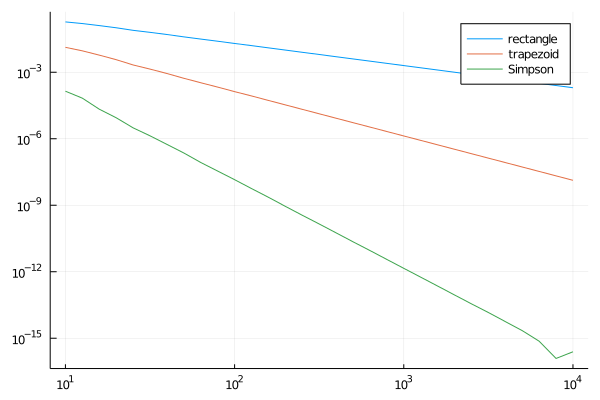

In [102]:
Ns = [10^i for i in 1:0.1:4]
f(x) = exp(2*x)
exact = 0.5*(exp(2) - exp(-2))
a, b = -1, 1
approx₁ = [rectangle(f, a, b, Int(floor(N))) for N in Ns]
approx₂ = [trapezoid(f, a, b, Int(floor(N))) for N in Ns]
approx₃ = [Simpson(f, a, b, Int(floor(N))) for N in Ns]
error₁ = error.(approx₁, exact)
error₂ = error.(approx₂, exact)
error₃ = error.(approx₃, exact)
plot(Ns, error₁, scale=:log10, label="rectangle")
plot!(Ns, error₂, scale=:log10, label="trapezoid")
plot!(Ns, error₃, scale=:log10, label="Simpson")

##### 3. Do the same for $\int_{-1}^2 \exp(-x^2) \, dx$. Use the `erf` function from the `SpecialFunctions.jl` package to calculate the "exact" result. [Hint: Check carefully the help for that function to make sure of the definition used.]

In [104]:
using SpecialFunctions

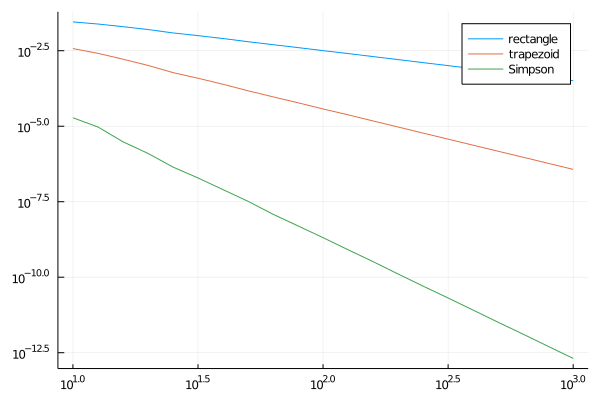

In [106]:
g(x) = exp(-x^2)
a, b = -1, 2
exact = √π/2*(erf(b) - erf(a))
Ns = [10^i for i in 1:0.1:3]
approx₁ = [rectangle(g, a, b, Int(floor(N))) for N in Ns]
approx₂ = [trapezoid(g, a, b, Int(floor(N))) for N in Ns]
approx₃ = [Simpson(g, a, b, Int(floor(N))) for N in Ns]
error₁ = error.(approx₁, exact)
error₂ = error.(approx₂, exact)
error₃ = error.(approx₃, exact)
plot(Ns, error₁, scale=:log10, label="rectangle")
plot!(Ns, error₂, scale=:log10, label="trapezoid")
plot!(Ns, error₃, scale=:log10, label="Simpson")

##### 4. We showed that the trapezium rule has error at most $\mathcal{O}(h^2)$. Consider the following integral of a smooth, periodic function:  $$I = \int_{0}^{2 \pi} \exp(\cos(\theta)) \, d\theta$$
Plot the error in the trapezium rule in this case. How fast does it decay with $N$? [This will be important later in the course.]   Note that this integral can be calculated exactly as $2π I_0(1)$, where $I_0$ is a **modified Bessel function**, which can be evaluated at 1 using the `SpecialFunctions.jl` package as `besseli(0, 1)`.



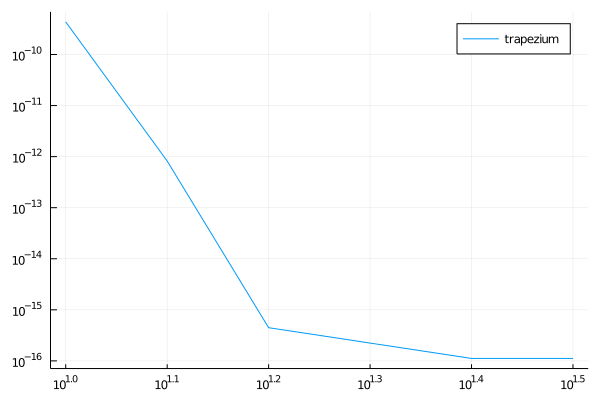

In [130]:
h(x) = exp(cos(x))
a, b = 0, 2*π
exact = 2*π*besseli(0, 1)
Ns = [10^i for i in 1:0.1:1.5]
approx = [trapezoid(h, a, b, Int(floor(N))) for N in Ns]
errors = error.(approx, exact)
plot(Ns, errors, scale=:log10, label="trapezium")
plot!(Ns, Ns)

In [127]:
errors

11-element Array{Float64,1}:
 4.348824090491761e-10
 8.207491981188444e-13
 4.466054676201031e-16
 2.2330273381005154e-16
 1.1165136690502577e-16
 1.1165136690502577e-16
 1.1165136690502577e-16
 3.349541007150773e-16
 3.349541007150773e-16
 0.0
 2.2330273381005154e-16

In [126]:
approx

11-element Array{Float64,1}:
 7.9549265244723015
 7.954926521019373
 7.9549265210128475
 7.954926521012846
 7.954926521012845
 7.954926521012845
 7.954926521012845
 7.954926521012847
 7.954926521012847
 7.954926521012844
 7.954926521012846

### Exercise 4: Euler method for ODEs

1. Implement the Euler method in a function `euler(f, x0, δt, t_final)`, assuming that $t_0 = 0$. Your code should work equally well if you put vectors in, to solve the equation $\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x})$.

2. Use your code to integrate the differential equation $\dot{x} = 2x$ from $t = 0$ to $t = 5$ with
initial condition $x_0 = 0.5$. Plot the exact solution and the numerical solution for values of $\delta t = 0.01, 0.05, 0.1, 0.5$. On a different plot show the relative error as a function of time, compared to the analytical solution.

3. Do the same for $\dot{x} = -2x$ with initial condition $x_0 = 3$.

4. For the above two cases, calculate the error at $t=5$ when the time interval is split into $N$ pieces for $N between 10 and 1000$. Plot the error as a function of $N$. What is the rate of convergence as $h \to 0$?


A pendulum satisfies the ODE $\ddot{\theta} + \sin(\theta) = 0$, where $\theta$ is the angle with the vertical.

5. Show analytically that the quantity ("energy") $E(\theta, \dot{\theta}) := \frac{1}{2} \dot{\theta}^2 - \cos(\theta)$ is **conserved** along a trajectory, i.e. that $\frac{d}{dt} [ E(\theta(t), \dot{\theta}(t)) = 0 ]$, so that $E(\theta(t), \dot{\theta}(t)) = E(\theta(t_0), \dot{\theta}(t_0))$.

6. Solve this equation using the Euler method for initial conditions $(0, 1)$ to show that the energy is *not* conserved.

7. Draw the phase plane. Explain graphically what is happening in terms of what each step does.

8. Plot $E$ as a function of time for different values of $\delta t$. How fast does it grow? Explain this in terms of what happens at each step.